

# Project: Investigate a Dataset - No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This dataset contains information about medical appointments in Brazil. It has about a hundred and ten thousand entries and focuses on whether or not patients show up for their appointments. Characteristics which include, but are not limited to, the demographics of each patient are included in each row. The **'Age'** and **'Gender'** of the patients were provided in columns along with the **'Patient Id'** and **'Appointment Id'** columns. Other columns provided in the table are explained below:

 1. **'ScheduledDay'** refers to the day the Patient booked the appointment.
 2. **'AppointmentDay'** refers to the day the Patient was set to see the Doctor.
 3. **'Neighbourhood'** refers to the location of the hospital.
 4. **'Scholarship'** gives the status of the enrollment of the patient in Bolsa Familia which is a Braziian welfare program (0 or 1).
 5. Four columns containining the disease conditions of the patient were provided. They include: **'Hipertension'**, **'Diabetes'**, **'Alcoholism'**, and **'Handicap'** (0 or 1).
 6. **'SMS_received'** records whether or not the patient received an short message text of prior to the appointment date (0 or 1).
 7. **'No_show'** records "No" for those who showed up for the appointment and "Yes" for the patients who did not show up on the set appointment day.



### Question(s) for Analysis


General Objective/Question: What factors should be considered in order to predict whether a patient will show for the appointment or not.


Specific Objectives/Questions:
 1. What proportion of Male and Female showed up for the appointment
 2. In which neighbourhood did the most patients show up?
 3. Is there a correlation between the patients on the Bolsa Familia scholarship and showing up for the appointment?
 4. Is there a correlation between the patients who received the SMS and showing up for the appointment?




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [4]:
df= pd.read_csv('C:\\Users\\Owner\\Downloads\\noshowappointments-kagglev2-may-2016.csv', sep=",")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
#checking for the number of rows and columns
df.shape

(110527, 14)

In [6]:
#checking for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
#checking for the description of the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



## Data Cleaning


### Cleaning Column Labels

In [8]:
#replacing hyphens with underscores and making column labels lowercase
df.rename(columns= lambda x: x.strip().lower().replace('-','_'), inplace= True)
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [9]:
#inserting underscores to separate certain column labels and correcting the spelling of 'hipertension'
df.rename(columns= {'patientid': 'patient_id', 'appointmentid': 'appointment_id', 'scheduledday': 'scheduled_day',
                    'appointmentday': 'appointment_day', 'hipertension': 'hypertension' }, inplace= True)
df.head(2)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


### Checking for duplicates and null values

In [10]:
#check for duplicates
df.duplicated().sum()

0

In [11]:
#check for null values
df.isnull().sum()

patient_id         0
appointment_id     0
gender             0
scheduled_day      0
appointment_day    0
age                0
neighbourhood      0
scholarship        0
hypertension       0
diabetes           0
alcoholism         0
handcap            0
sms_received       0
no_show            0
dtype: int64

### Cleaning Invalid Data

In [12]:
#dropping the row with "-1" in the age column
#first, let's find the row
df[df['age'] == -1]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,4.659430e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [13]:
#now let's drop the row
df.drop(index= 99832, axis= 0, inplace= True)

In [14]:
#let's check if we successfully dropped the row
df[df['age'] == -1]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show


<a id='eda'></a>
## Exploratory Data Analysis



### The distribution of age in the dataset

##### This investigates the frequency of ages in the dataset given above.

Text(0, 0.5, 'Frequency')

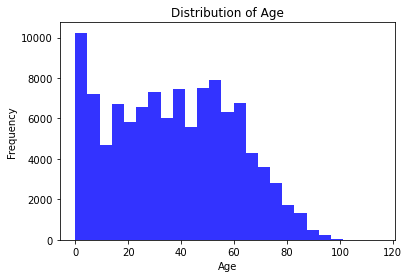

In [15]:
plt.hist(df.age, 25, facecolor = 'b', alpha= 0.8)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')


#### The following cell aims to get the number of patient whose ages are below or equal to a certain age passed into the function.

In [18]:
def age_range(x):
    """
    This function gets the number of patients with ages less than or equal to x from the age
    column in the no-show appointment dataframe.
    """
    d= df[df.age <= x]
    return d.shape[0]

age_range(20)

31848

### Research Question 1: What Proportion of the Male and Female Showed Up for the Appointment?

#### Let us load the datasets that contain males and females seperately

In [15]:
df_Male= df.query('gender == "M"')
df_Female= df.query('gender == "F"')


#### Let's find the number of males and females that showed up

In [16]:
df_Male_showup= df_Male.query('no_show == "No"')
df_Female_showup= df_Female.query('no_show == "No"')

#### Proportion of males that showed up

In [17]:
Male_proportion = df_Male_showup.shape[0]/df_Male.shape[0]
Male_proportion

0.8003205211052808

#### Proportion of females that showed up

In [18]:
Female_proportion = df_Female_showup.shape[0]/df_Female.shape[0]
Female_proportion

0.7968512924734475

#### Let's visualize our finding using a bar chart

Text(0, 0.5, 'Proportion')

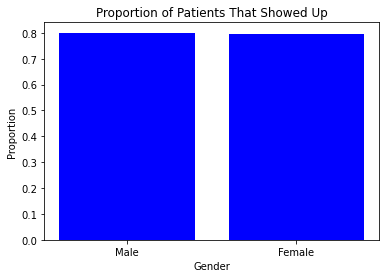

In [19]:
plt.bar(["Male", "Female"], [Male_proportion, Female_proportion], color= 'blue')
plt.title("Proportion of Patients That Showed Up")
plt.xlabel("Gender")
plt.ylabel("Proportion")

#### From the analysis above we have seen that the proportions of male and female who showed up for their appointments are almost equal. The difference may not significantly affect decision-making.

### Research Question 2: In which neighbourhood did the most patients show up?

#### Let's get the dataframes of the patients that showed up and those that did not.

In [20]:
showed_up = df.query('no_show== "No"')
no_showup = df.query('no_show == "Yes"')

#### Let's find the neighbourhood that got the most medical appointments

In [21]:
df.neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: neighbourhood, Length: 81, dtype: int64

#### Let's find the neighbourhood in which the most patients showed up.

In [22]:
showed_up.neighbourhood.value_counts()

JARDIM CAMBURI       6252
MARIA ORTIZ          4586
RESISTÊNCIA          3525
JARDIM DA PENHA      3246
SANTA MARTHA         2635
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: neighbourhood, Length: 80, dtype: int64

#### Let's find the number of patients who did not show up in each neighbourhood

In [23]:
no_showup.neighbourhood.value_counts()

JARDIM CAMBURI                 1465
MARIA ORTIZ                    1219
ITARARÉ                         923
RESISTÊNCIA                     906
CENTRO                          703
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHAS OCEÂNICAS DE TRINDADE       2
ILHA DO FRADE                     2
AEROPORTO                         1
Name: neighbourhood, Length: 80, dtype: int64

#### In the above analysis the 'Jardim Camburi' neighbourhood was the most visited.

### Research Question 3: Is there a correlation between the patients on the Bolsa Familia scholarship and showing up for the appointment?


#### Let's find the number of patients who are on scholarship

In [24]:
on_scholarship= df.query('scholarship == 1')
on_scholarship.shape[0]

10861

#### Let's find the number of patients who showed up and are on scholarship

In [25]:
showed_on_scholarship = on_scholarship.query('no_show == "No"')
showed_on_scholarship.shape[0]

8283

#### Let's find the number of patients who are not on scholarship

In [26]:
not_on_scholarship = df.query('scholarship == 0')
not_on_scholarship.shape[0]

99665

#### Let's find the number of patients who showed up and are not on scholarship

In [27]:
showed_not_scholarship = not_on_scholarship.query('no_show == "No"')
showed_not_scholarship.shape[0]

79924

#### Let's find the proportion of patients who showed up and are on scholarship

In [28]:
prop_scholarship = showed_on_scholarship.shape[0]/on_scholarship.shape[0]
prop_scholarship

0.7626369579228433

#### Let's find the proportion of patients who showed up and are not on scholarship

In [29]:
prop_no_scholarship = showed_not_scholarship.shape[0]/not_on_scholarship.shape[0]
prop_no_scholarship

0.8019264536196258

#### Now let's plot the findings of both proportions 

Text(0, 0.5, 'Proportion')

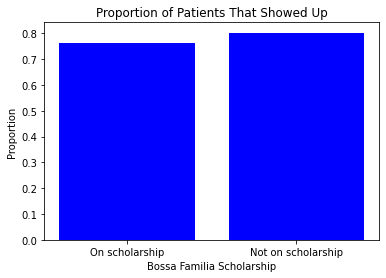

In [39]:
plt.bar(["On scholarship", "Not on scholarship"], [prop_scholarship, prop_no_scholarship], color= 'blue')
plt.title("Proportion of Patients That Showed Up")
plt.xlabel("Bossa Familia Scholarship")
plt.ylabel("Proportion")

#### In the above analysis it was discovered that the proportion of patients that showed up and are on scholarship is roughly equal to the proportion of patients that showed up but are not on scholarship.

### Research Question 4: Is there a correlation between the patients who received the SMS and showing up for the appointment?


#### Let's find the number of patients who got the SMS

In [31]:
got_sms = df.query('sms_received == 1')
got_sms.shape[0]

35482

#### Let's find the number of patients who got the SMS and showed up

In [32]:
sms_show = got_sms.query('no_show == "No"')
sms_show.shape[0]

25698

#### Let's find the number of patients who did not get the SMS

In [33]:
no_sms = df.query('sms_received == 0')
no_sms.shape[0]

75044

#### Let's find the number of patients who did not get the SMS but showed up

In [34]:
sms_no_show = no_sms.query('no_show == "Yes"')
sms_no_show.shape[0]

12535

#### Let's find the proportion of patients that got the sms and showed up

In [35]:
prop_sms_show = sms_show.shape[0]/got_sms.shape[0]
prop_sms_show

0.7242545516036301

#### Let's find the proportion of patients that did not get the sms but showed up

In [36]:
prop_nosms_show = sms_no_show.shape[0]/no_sms.shape[0]
prop_nosms_show

0.16703533926762965

#### Now let's plot the findings of both proportions

Text(0, 0.5, 'Proportion')

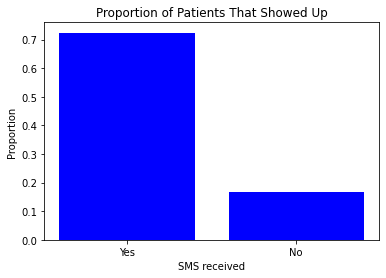

In [48]:
plt.bar(["Yes", "No"], [prop_sms_show, prop_nosms_show], color= 'blue')
plt.title("Proportion of Patients That Showed Up")
plt.xlabel("SMS received")
plt.ylabel("Proportion")

#### In the above analysis it is noticed that the proportion of patients who got the sms and showed up is about 4.5 times the proportion of patients who did not get the sms and showed up.

<a id='conclusions'></a>
## Conclusions

#### Research Question 1: What Proportion of the Male and Female Showed Up for the Appointment?
I discovered that the proportions of males and females that showed up are almost equal and may not be useful to determine if the gender affect the event of showing up for appointments. However, additional research may be useful to determine if the gender affects the event of showing up for appointments.

#### Research Question 2:  In which neighbourhood did the most patients show up?
The health facility located in JARDIM CAMBURI got the most appointments and also, most patients showed up in this location.    

#### Research Question 3: Is there a correlation between the patients on the Bolsa Familia scholarship and showing up for the appointment?
The proportion of patients who were on the scholarship that showed up was slightly lower than the proportion of patients who were not on the scholarship that showed up. However, the difference is not significant enough to ascertain that those who are not on the scholarship are more likely to show up for appointments. 

#### Research Question 4: Is there a correlation between the patients who received the SMS and showing up for the appointment?

The proportion of patients who received SMS and showed up is significantly higher than those who did not receive SMS and showed up. This clearly shows that sms reminder is one of the major factor to consider to predict whether a patient will show up for the appointment or not.

#### Limitations: Some limitations we encountered with the data include
1. There was one invalid data.
2. The number of females who scheduled the appointment was about twice the number of males. This pose a threat of underrepresentation of male data. Hence, the analysis of the male data may not be as accurate as the female data.
3. Additional data such as previous visit to the hospitals may help the analysis and make the predictions more accurate.

In [38]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset1.ipynb'])

4294967295